In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import json
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split, cross_validate,StratifiedKFold
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
#from sklearn.pipeline import Pipel
import pandas as pd
import numpy as np
import ast
import string
import nltk
import matplotlib.pyplot as plt
#nltk.download('wordnet')
import seaborn as sns
from sklearn import svm
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/prot')

In [ ]:
#dik=np.load("sm_w2v.pkl",allow_pickle=True)#wrong
dik=np.load("sm_w2v2.pkl",allow_pickle=True)#use this for best
#dik=np.load("sm_w2v_new_data.pkl",allow_pickle=True)#use this for best
#dik=np.load("sm_w2v3.pkl",allow_pickle=True)#w2v embdedded smiles

In [ ]:
y=[]
x=[]
xt=[]
yt=[]
ll=["2Q0A","4D7S","3NEF","5ZCU","3NMH","3QT0","5UC1","3H52","1QKT","5TOA","3B7D","4F1Y"]
for i,num in enumerate(dik):
  dik[i][2]=np.sum(np.array(dik[i][2]),axis=0)
  dik[i][1]=dik[i][1].reshape((1,dik[i][1].shape[0]*dik[i][1].shape[1]))
  temp=np.hstack([dik[i][2].reshape((1,100)),dik[i][1]])
  #if dik[i][0] not in ll:
  y.append(dik[i][3])
  x.append(temp.reshape((temp.shape[1])))
  #else:
  #  yt.append(dik[i][3])
  #  xt.append(temp.reshape((temp.shape[1])))

In [ ]:
#temp
y=[]
x=[]
xt=[]
yt=[]
ll=["2Q0A","4D7S","3NEF","5ZCU","3NMH","3QT0","5UC1","3H52","1QKT","5TOA","3B7D","4F1Y"]
for i,num in enumerate(dik):
  dik[i][2]=np.sum(np.array(dik[i][2]),axis=0)
  dik[i][1]=dik[i][1].reshape((1,dik[i][1].shape[0]*dik[i][1].shape[1]))
  temp=np.hstack([dik[i][2].reshape((1,100)),dik[i][1]])
  #if dik[i][0] not in ll:
  y.append(dik[i][4])
  x.append(temp.reshape((temp.shape[1])))
  #else:
  #  yt.append(dik[i][3])
  #  xt.append(temp.reshape((temp.shape[1])))

In [ ]:

y=[]
x=[]
xt=[]
yt=[]
ll=["2Q0A","4D7S","3NEF","5ZCU","3NMH","3QT0","5UC1","3H52","1QKT","5TOA","3B7D","4F1Y"]
for i,num in enumerate(dik):
  dik[i][2]=np.sum(np.array(dik[i][2]),axis=0)
  #dik[i][1]=dik[i][1].reshape((1,dik[i][1].shape[0]*dik[i][1].shape[1]))
  temp=np.hstack([dik[i][2].reshape((1,100)),np.array(dik[i][3]).reshape((1,100))])
  #if dik[i][0] not in ll:
  y.append(dik[i][4])
  x.append(temp.reshape((temp.shape[1])))
  #else:
  #  yt.append(dik[i][3])
  #  xt.append(temp.reshape((temp.shape[1])))

In [ ]:
x=np.asarray(x)
y=np.asarray(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

# MODELS

f1 0.5009180727830362
precision 0.7481357020143858
accuracy 0.7505102040816326
roc_auc 0.6855276469562184
[[ 3 35]
 [ 0 85]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        38
           1       0.71      1.00      0.83        85

    accuracy                           0.72       123
   macro avg       0.85      0.54      0.49       123
weighted avg       0.80      0.72      0.62       123



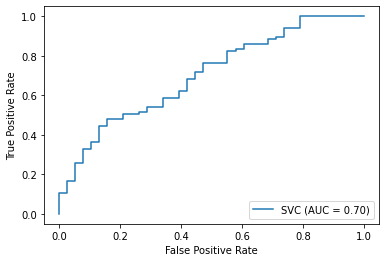

0.5394736842105263

In [ ]:
from sklearn import svm
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
#Create a svm Classifier
clf = svm.SVC()# Linear Kernel
print("f1",np.mean(cross_val_score(clf, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(clf, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(clf, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(clf, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
plt.show()  
roc_auc_score(y_test, y_pred)  

In [ ]:
_ = joblib.dump(clf, "svm_smiles.pkl", compress=9)

f1 0.7135556074505109
precision 0.8205091306878034
accuracy 0.8219812925170069
roc_auc 0.8636054421768709
[[12 26]
 [ 0 85]]
              precision    recall  f1-score   support

           0       1.00      0.32      0.48        38
           1       0.77      1.00      0.87        85

    accuracy                           0.79       123
   macro avg       0.88      0.66      0.67       123
weighted avg       0.84      0.79      0.75       123



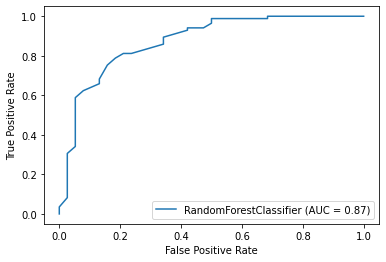

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
#print(X_test
print("f1",np.mean(cross_val_score(forest, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(forest, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(forest, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(forest, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(forest, X_test, y_test)  # doctest: +SKIP
plt.show() 

In [ ]:
_ = joblib.dump(forest, "rf_smiles.pkl", compress=9)

{'bootstrap': False, 'max_depth': None, 'max_features': 100, 'n_estimators': 50}
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=100,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[16 22]
 [ 2 83]]
              precision    recall  f1-score   support

           0       0.89      0.42      0.57        38
           1       0.79      0.98      0.87        85

    accuracy                           0.80       123
   macro avg       0.84      0.70      0.72       123
weighted avg       0.82      0.80      0.78       123



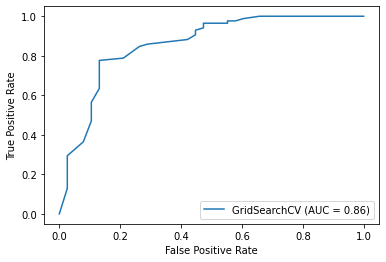

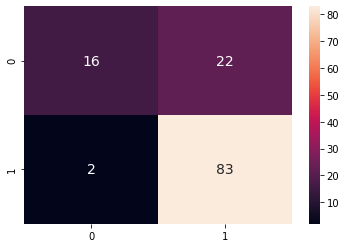

0.6987616099071208

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = [
{'n_estimators': [10, 25,50], 'max_features': [5, 10,15,20,100], 
 'max_depth': [10,None], 'bootstrap': [True, False]}
]
forest = RandomForestClassifier()
h_forest = GridSearchCV(forest, param_grid, cv=10, scoring='f1',verbose=0)

h_forest.fit(X_train, y_train)

print(h_forest.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(h_forest.best_estimator_) 
y_pred = h_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(h_forest, X_test, y_test)  # doctest: +SKIP
plt.show()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')

plt.show()
roc_auc_score(y_test, y_pred) 

f1 0.7587137120319454
precision 0.8466857061746904
accuracy 0.8342687074829931
roc_auc 0.8640397697540555
[[18 20]
 [ 1 84]]
              precision    recall  f1-score   support

           0       0.95      0.47      0.63        38
           1       0.81      0.99      0.89        85

    accuracy                           0.83       123
   macro avg       0.88      0.73      0.76       123
weighted avg       0.85      0.83      0.81       123



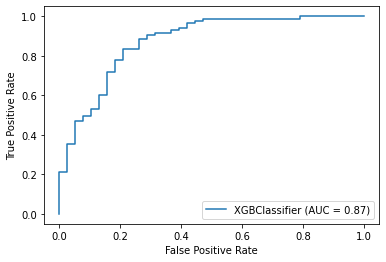

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

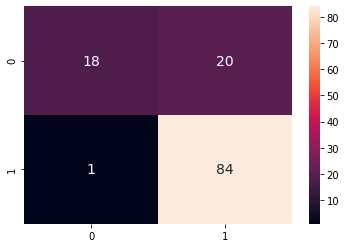

In [ ]:
from xgboost import XGBClassifier,plot_importance
# fit model no training data
model = XGBClassifier()
print("f1",np.mean(cross_val_score(model, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(model, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(model, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
#plt.savefig("smiles_opt/xgb_roc.png")
plt.show()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')
#plt.savefig("smiles_opt/xgb_heat.png")
model.get_params  

In [ ]:
from xgboost import XGBClassifier,plot_importance
# fit model no training data
model = XGBClassifier()
model.fit(x, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
_ = joblib.dump(model, "xgb_smiles.pkl", compress=9)

[[0 5]
 [1 5]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      0.83      0.62         6

    accuracy                           0.45        11
   macro avg       0.25      0.42      0.31        11
weighted avg       0.27      0.45      0.34        11



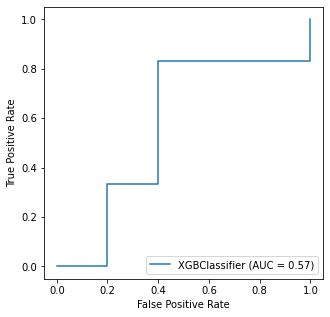

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

In [ ]:
y_pred = model.predict(xt)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(yt, predictions))
print(classification_report(yt, predictions))
metrics.plot_roc_curve(model, xt, yt)  # doctest: +SKIP
plt.show()
model.get_params  

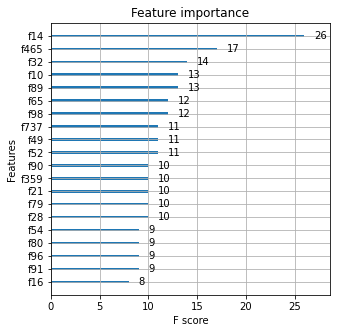

In [ ]:
plot_importance(model, max_num_features = 20)
#plt.savefig("smiles_opt/xgb_fi.png")
plt.show()

In [ ]:
mm=pd.Series(model.feature_importances_)
len(mm[mm>0])
#num features used by xgb

128

In [ ]:
from xgboost import cv
import xgboost as xgb
params = {"objective":"binary:logistic",'colsample_bytree': 1,'learning_rate': 0.1,
                'max_depth': 3, 'alpha': 0}
data_dmatrix = xgb.DMatrix(data=x,label=y)
xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=10,stratified=True,
                    num_boost_round=500, metrics={"map","auc","error"}, seed=123)

In [ ]:
xgb_cv.tail()

,train-auc-mean,train-auc-std,train-error-mean,train-error-std,train-map-mean,train-map-std,test-auc-mean,test-auc-std,test-error-mean,test-error-std,test-map-mean,test-map-std
495,1.0,0.0,0.0,0.0,1.0,0.0,0.882612,0.036746,0.153274,0.043765,0.947229,0.017284
496,1.0,0.0,0.0,0.0,1.0,0.0,0.882820,0.036869,0.153274,0.043765,0.947335,0.017364
497,1.0,0.0,0.0,0.0,1.0,0.0,0.883263,0.036436,0.153274,0.043765,0.947562,0.017205
498,1.0,0.0,0.0,0.0,1.0,0.0,0.883476,0.036612,0.153274,0.043765,0.947639,0.017208
499,1.0,0.0,0.0,0.0,1.0,0.0,0.883263,0.036909,0.153274,0.043765,0.947522,0.017333


Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 916 tasks      | elapsed: 57.5min
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed: 57.7min finished


{'colsample_bytree': 1.0, 'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 1}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
[[ 21  18]
 [  5 100]]
              precision    recall  f1-score   support

           0       0.81      0.54      0.65        39
           1       0.85      0.95      0.90       105

    accuracy                           0.84       144
   macro avg       0.83      0.75      0.77       144
weighted avg       0.84      0.84      0.83       144



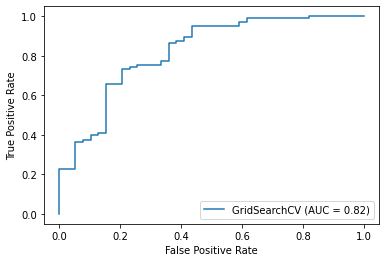

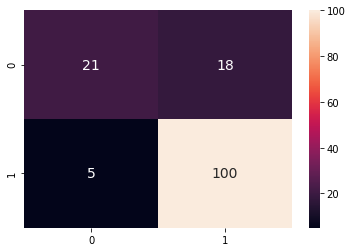

0.7454212454212453

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = [
{"max_depth"        : [ 3,4],
 "min_child_weight" : [ 1, 3, 5 ,10],
 "gamma"            : [ 0.0, 0.1 , 0.3,1.0 ],
 "colsample_bytree" : [  0.5 ,1.0 ,1.5,2.0]}
]
model = XGBClassifier()
h_forest = GridSearchCV(model, param_grid, cv=10, scoring='accuracy',verbose=1,n_jobs=-1)
h_forest.fit(X_train, y_train) 

print(h_forest.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(h_forest.best_estimator_) 
y_pred = h_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(h_forest, X_test, y_test)  # doctest: +SKIP

plt.show()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')


plt.show()
roc_auc_score(y_test, y_pred) 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
print("f1",np.mean(cross_val_score(model, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("f1",np.mean(cross_val_score(model, x, y,scoring="f1",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(model, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(model, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))

f1 0.5869936505634027
f1 0.8973718814876133
precision 0.8381084361941274
accuracy 0.8203002746992517
accuracy [0.82173913 0.83224401 0.80610022 0.82135076 0.83660131 0.80827887
 0.82788671 0.80610022 0.81917211 0.82352941]
roc_auc 0.6844750292230634


In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([ 856, 3736]))

f1 0.8044128372294646
precision 0.8805162643414928
accuracy 0.85671768707483
accuracy [0.87755102 0.85714286 0.83673469 0.87755102 0.87755102 0.79591837
 0.85714286 0.91836735 0.87755102 0.79166667]
roc_auc 0.8426321297749869
[[18 20]
 [ 7 78]]
              precision    recall  f1-score   support

           0       0.72      0.47      0.57        38
           1       0.80      0.92      0.85        85

    accuracy                           0.78       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.77      0.78      0.77       123



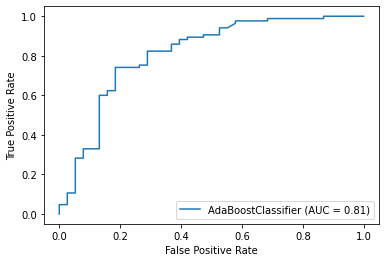

In [ ]:
  from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
print("f1",np.mean(cross_val_score(model, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(model, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(model, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
calibrator = CalibratedClassifierCV(model, cv='prefit')
calibrator.fit(x, y)
# evaluate the model
yhat = calibrator.predict_proba(x)

[[11 15]
 [ 0 72]]
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        26
           1       0.83      1.00      0.91        72

    accuracy                           0.85        98
   macro avg       0.91      0.71      0.75        98
weighted avg       0.87      0.85      0.82        98



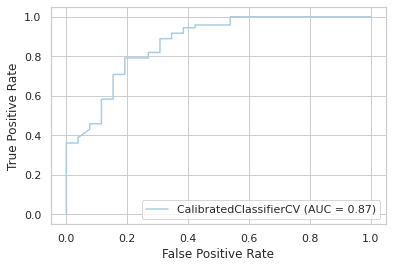

In [ ]:
y_pred = calibrator.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(calibrator, X_test, y_test)  # doctest: +SKIP
plt.show()

In [ ]:
_ = joblib.dump(calibrator, "adaboost_smiles_calibrated_4.pkl", compress=9)

In [ ]:
k_ = joblib.dump(model, "adaboost_smiles.pkl", compress=9)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x,y)
# evaluate the model
calibrator = CalibratedClassifierCV(model, cv=3, method = 'isotonic')
print("f1",np.mean(cross_val_score(calibrator, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(calibrator, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(calibrator, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",(cross_val_score(calibrator, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(calibrator, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))

f1 0.6084543528906862


KeyboardInterrupt: ignored

In [ ]:
calibrator.fit(x,y)

CalibratedClassifierCV(base_estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                         base_estimator=None,
                                                         learning_rate=1.0,
                                                         n_estimators=50,
                                                         random_state=None),
                       cv=10, method='isotonic')

f1 0.7903870631188584
precision 0.8714155475418028
accuracy 0.844515306122449
accuracy [0.87755102 0.83673469 0.83673469 0.81632653 0.89795918 0.79591837
 0.83673469 0.91836735 0.81632653 0.8125    ]
roc_auc 0.8378867957439387
[[17  9]
 [ 7 65]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        26
           1       0.88      0.90      0.89        72

    accuracy                           0.84        98
   macro avg       0.79      0.78      0.79        98
weighted avg       0.83      0.84      0.83        98



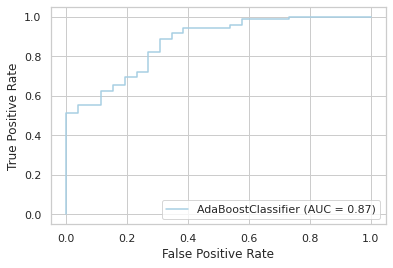

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=60)
# evaluate the model
print("f1",np.mean(cross_val_score(model, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(model, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(model, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
plt.show()

In [ ]:
model.predict_proba(x)

array([[0.43341532, 0.56658468],
       [0.48344719, 0.51655281],
       [0.46304084, 0.53695916],
       [0.4702807 , 0.5297193 ],
       [0.47797867, 0.52202133],
       [0.47797867, 0.52202133],
       [0.47251007, 0.52748993],
       [0.4378674 , 0.5621326 ],
       [0.48524988, 0.51475012],
       [0.46573324, 0.53426676],
       [0.49528629, 0.50471371],
       [0.47114088, 0.52885912],
       [0.47114088, 0.52885912],
       [0.46450778, 0.53549222],
       [0.46948568, 0.53051432],
       [0.47172613, 0.52827387],
       [0.48913376, 0.51086624],
       [0.49364183, 0.50635817],
       [0.50306436, 0.49693564],
       [0.45648864, 0.54351136],
       [0.48986702, 0.51013298],
       [0.48188547, 0.51811453],
       [0.48686616, 0.51313384],
       [0.46491944, 0.53508056],
       [0.47473411, 0.52526589],
       [0.47348949, 0.52651051],
       [0.45168011, 0.54831989],
       [0.45037517, 0.54962483],
       [0.48545981, 0.51454019],
       [0.47574968, 0.52425032],
       [0.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
f1_adab = cross_val_score(model, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))
prec_adab = cross_val_score(model, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))
acc_adab = cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))
roc_adab = cross_val_score(model, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))

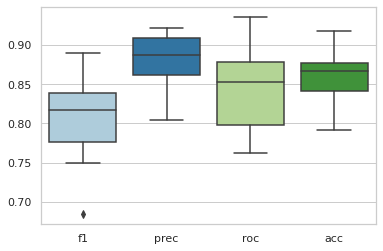

In [ ]:
df = pd.DataFrame(f1_adab, columns=['f1']) 
df['prec'] = pd.Series(prec_adab, index=df.index)
df['roc'] = pd.Series(roc_adab, index=df.index)
df['acc'] = pd.Series(acc_adab, index=df.index)
sns.set_theme()
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Paired"))
ax = sns.boxplot(data=df)
plt.savefig("smiles_opt/adab_cv_scores.png",dpi=1000)

[[1 4]
 [2 4]]
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.50      0.67      0.57         6

    accuracy                           0.45        11
   macro avg       0.42      0.43      0.41        11
weighted avg       0.42      0.45      0.43        11



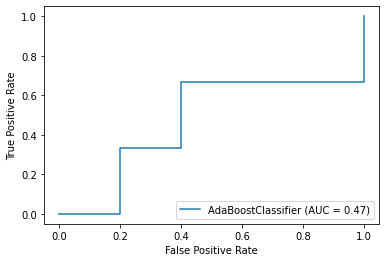

<bound method BaseEstimator.get_params of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)>

In [ ]:
y_pred = model.predict(xt)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(yt, predictions))
print(classification_report(yt, predictions))
metrics.plot_roc_curve(model, xt, yt)  # doctest: +SKIP
plt.show()

In [ ]:
abc=pd.Series(model.feature_importances_)
abc=(abc[abc>0])
print(len(abc))
abc=abc.index.values
len(abc[abc>=100])

47


16

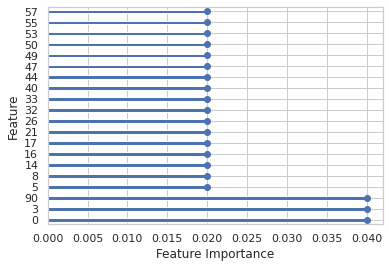

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=range(0,x.shape[1]))
sns.set_theme()
sns.set_style("whitegrid")
fig=feat_importances.nlargest(20)
fig.plot(kind='barh',width=0.3,color="b").get_figure()
fig=plt.scatter(fig.values,range(20),marker='o',zorder=2)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
#plt.savefig("smiles_opt/adab_fi.png",dpi=1000)

In [ ]:
len(feat_importances)

11500

In [ ]:
w2v=[]
sm=[]
feat_importances=pd.Series(model.feature_importances_)
for n,i in feat_importances.nlargest(50).items():
  if n<100:
    w2v.append(i)
  else:
    sm.append(i)
  

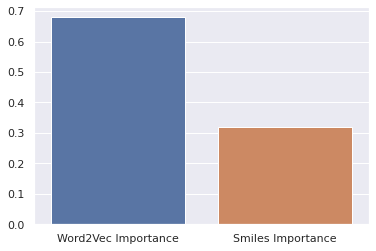

In [ ]:
vals=[sum(w2v),sum(sm)]
sns.set_style('darkgrid')
sns.barplot(x=["Word2Vec Importance","Smiles Importance"],y=vals)

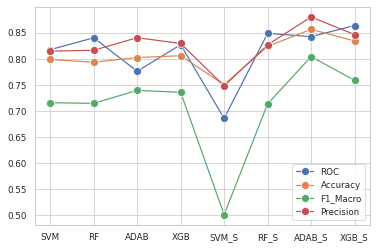

In [ ]:
rocs=[0.8176794871794872,0.8404819711538462,0.7762131410256411,0.827227564102564,0.6855276469562184,0.8490083725798012,0.8426321297749869,0.8640397697540555]
accs=[0.798896103896104,0.7935389610389609,0.8025974025974026,0.8060714285714285,0.7505102040816326,0.8240221088435374,0.85671768707483,0.8342687074829931]
f1s=[0.869157725179299,0.8623388103828411,0.8670799481793561,0.8717332629732863,0.8537409074708343,0.891509940758775,0.9049227625560169,0.8930376452690778]
f1s_mic=[0.7158201213309083,0.7145778103520485,0.7394802782940438,0.7357758493441369,0.5009180727830362,0.7135443956813043,0.8044128372294646,0.7587137120319454]
precs=[0.814921497584541,0.8164649137569981,0.8406565221701667,0.8295932480742219,0.7481357020143858,0.8269091940390864,0.8805162643414928,0.8466857061746904]
xax=["SVM","RF","ADAB","XGB","SVM_S","RF_S","ADAB_S","XGB_S"]

sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")
sns.lineplot(x=xax,y=rocs,label="ROC",marker="o",markersize=8)
sns.lineplot(x=xax,y=accs,label="Accuracy",marker="o",markersize=8)
sns.lineplot(x=xax,y=f1s_mic,label="F1_Macro",marker="o",markersize=8)
sns.lineplot(x=xax,y=precs,label="Precision",marker="o",markersize=8)
plt.legend(loc="lower right")
plt.savefig("combined_scores_w2v_s_2_white.png",dpi=1000)
plt.show()

Calibration Curves

In [ ]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import calibration_curve


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
models = [AdaBoostClassifier(),XGBClassifier(),svm.SVC(probability=True),RandomForestClassifier()]
names = ["ada","xgb","svc","random"]

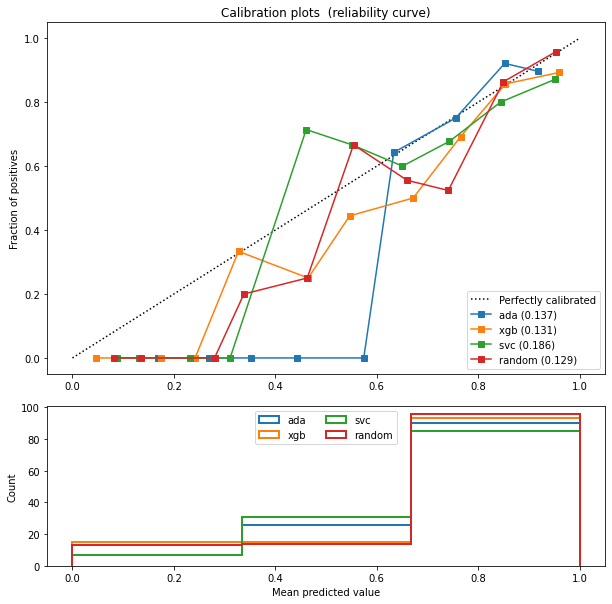

In [ ]:
fig = plt.figure(n, figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for n,i in enumerate(models):
  #i = CalibratedClassifierCV(i, cv=10, method='sigmoid')
  i = CalibratedClassifierCV(i, cv=10, method='isotonic')
  i.fit(X_train, y_train)
  y_pred = i.predict(X_test)
  y_prob = i.predict_proba(X_test)[:, 1]
  clf_score = brier_score_loss(y_test, y_prob, pos_label=1)
  fraction_of_positives, mean_predicted_value =calibration_curve(y_test, y_prob, n_bins=10)
  ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                   label="%s (%1.3f)" % (names[n], clf_score))
  ax2.hist(y_prob, range=(0, 1), bins=3, label=names[n],
                   histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

In [ ]:
i.predict_proba(X_test)

More tests

In [ ]:
dik=np.load("sm_w2v2.pkl",allow_pickle=True)

In [ ]:
y=[]
x=[]
for i,num in enumerate(dik):
  dik[i][2]=np.sum(np.array(dik[i][2]),axis=0)
  #dik[i][1]=dik[i][1].reshape((1,dik[i][1].shape[0]*dik[i][1].shape[1]))
  y.append(dik[i][3])
  #temp=np.hstack([dik[i][2].reshape((1,100)),dik[i][1]])
  temp=[j for j in dik[i][1]]
  temp.append(np.array(dik[i][2]))
  x.append(np.array(temp))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, np.asarray(y), test_size=0.35)

In [ ]:
ragged_x_train = tf.ragged.constant(X_train)
ragged_x_test = tf.ragged.constant(X_test)

In [ ]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
from keras.layers import LSTM
tf.random.set_seed(1337)
np.random.seed(1337)
def model():
  keras_model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=[None,100],ragged=True),
      #tf.keras.layers.Embedding(1454409, 27),
      tf.keras.layers.LSTM(64, return_sequences=True,dropout=0.2),#64
      tf.keras.layers.LSTM(64,dropout=0.2),#32
      tf.keras.layers.Dense(64),#32
      tf.keras.layers.Activation(tf.nn.relu),
      tf.keras.layers.Dense(1)
  ])

  keras_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])#(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])
  keras_model.summary()
  return keras_model

In [ ]:
keras_model = model()
keras_model.fit(ragged_x_train,y_train,batch_size=100,epochs=100)
scor = keras_model.evaluate(ragged_x_test, y_test, batch_size=100)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, None, 64)          42240     
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
activation_8 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 79,489
Trainable params: 79,489
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 [==============================] - 4s 352ms/step - loss: 5.9658 - accuracy: 0.2669
Epoch 2/100
4/4 [

In [ ]:
pds = keras_model.predict(ragged_x_test)

In [ ]:
count=0
for n,(i,j) in enumerate(zip(rounder(pds),y_test)):
  if i==j:
    count+=1
count/len(y_test)

0.6976744186046512

In [ ]:
def rounder(arr):
  rounded=[]
  for i in arr:
    if i<0.5:
      rounded.append(0)
    else:
      rounded.append(1)
  return rounded

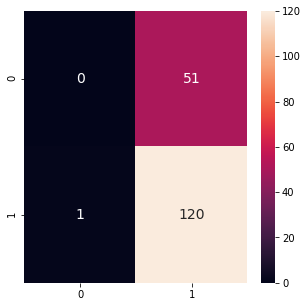

In [ ]:
from sklearn.metrics import confusion_matrix
np.round(pds)
matrix = confusion_matrix(y_test, rounder(pds))
sns.heatmap(matrix, annot=True, annot_kws={"size": 14}, fmt='g')
plt.show()

In [ ]:
#dik=np.load("sm_w2v_moldis.pkl",allow_pickle=True)
dik=np.load("sm_w2v_ligmat.pkl",allow_pickle=True)
y=[]
x=[]
xt=[]
yt=[]
t1=[]
ll=["2Q0A","4D7S","3NEF","5ZCU","3NMH","3QT0","5UC1","3H52","1QKT","5TOA","3B7D","4F1Y"]
for i,num in enumerate(dik):
  if np.array(dik[i][3]).shape[0]!=0:
    dik[i][2]=np.sum(np.array(dik[i][2]),axis=0)
    dik[i][3]=np.pad(np.array(dik[i][3]),(0,(1000-len(dik[i][3]))),'constant')
    t1.append(dik[i][3])
    temp=np.hstack([dik[i][2].reshape((1,100)),dik[i][3].reshape((1,dik[i][3].shape[0]))])
    y.append(dik[i][4])
    x.append(temp.reshape((temp.shape[1])))

In [ ]:
len(x),len(y)

(403, 403)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 403 samples in 0.021s...
[t-SNE] Computed neighbors for 403 samples in 0.298s...
[t-SNE] Computed conditional probabilities for sample 403 / 403
[t-SNE] Mean sigma: 416.962622
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.791779
[t-SNE] KL divergence after 300 iterations: 0.109832


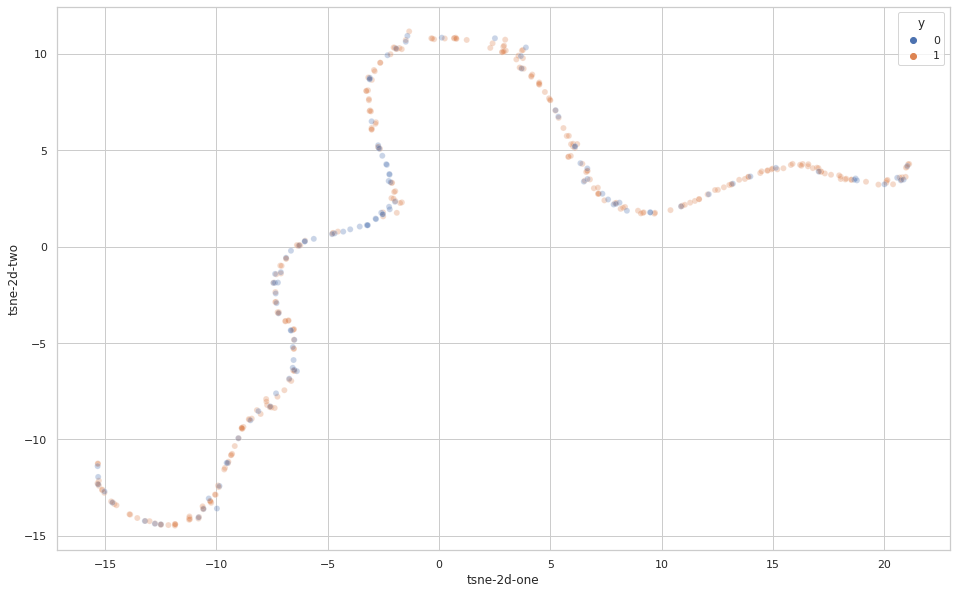

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
d2=pd.DataFrame(data=t1)
#d2.insert(100, "100", output, True) 
#print(d2)
df_subset=pd.DataFrame()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(d2)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset["y"]=y
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    data=df_subset,
    legend="full",
    alpha=0.3
)
#plt.savefig("tsne_lig_feats.png")

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(d2)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
op = pd.Series(y)
finalDf = pd.concat([principalDf, op], axis = 1)

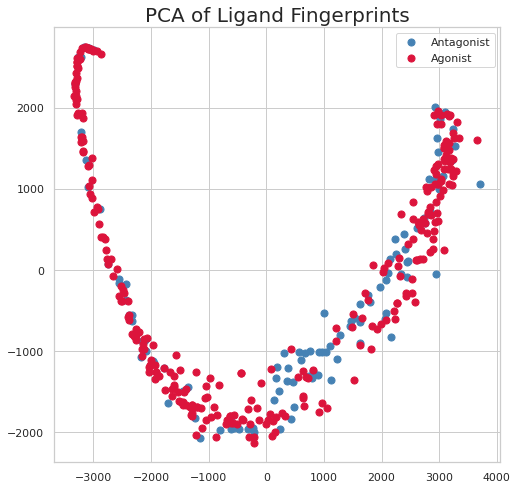

In [ ]:
sns.set_theme()
sns.set_style("whitegrid")
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA of Ligand Fingerprints', fontsize = 20)
targets = [0,1]
colors = ['steelblue', 'crimson']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf.iloc[:,2] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(["Antagonist","Agonist"])
#ax.grid()
plt.show()
#plt.savefig("pca_lig_feats.png")

f1 0.832979643480998
precision 0.7622324628776241
accuracy 0.7342682926829268
accuracy [0.73170732 0.75609756 0.80487805 0.75       0.725      0.75
 0.725      0.775      0.675      0.65      ]
roc_auc 0.6234064785788924
[[ 5 19]
 [ 5 72]]
              precision    recall  f1-score   support

           0       0.50      0.21      0.29        24
           1       0.79      0.94      0.86        77

    accuracy                           0.76       101
   macro avg       0.65      0.57      0.58       101
weighted avg       0.72      0.76      0.72       101



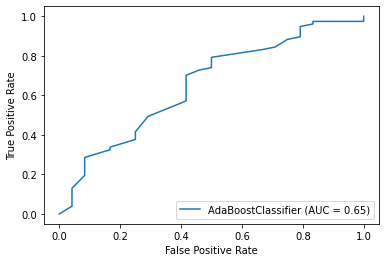

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.25,random_state=0)

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
print("f1",np.mean(cross_val_score(model, principalComponents, y,scoring="f1",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(model, principalComponents, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(model, principalComponents, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",(cross_val_score(model, principalComponents, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(model, principalComponents, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
plt.show()

f1 0.8727639364823621
precision 0.8531798416437393
accuracy 0.8117073170731708
accuracy [0.73170732 0.80487805 0.7804878  0.825      0.75       0.875
 0.875      0.85       0.8        0.825     ]
roc_auc 0.7608934169278997
[[13 11]
 [13 64]]
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        24
           1       0.85      0.83      0.84        77

    accuracy                           0.76       101
   macro avg       0.68      0.69      0.68       101
weighted avg       0.77      0.76      0.77       101



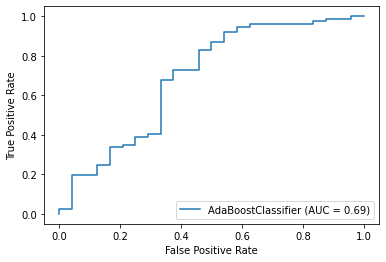

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
print("f1",np.mean(cross_val_score(model, x, y,scoring="f1",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(model, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(model, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
plt.show()

Latent space embeddings

In [ ]:
#dik=np.load("sm_w2v_moldis.pkl",allow_pickle=True)#with fingerprints
dik=np.load("sm_w2v_latent.pkl",allow_pickle=True)
y=[]
x=[]
xt=[]
yt=[]
t1=[]
ll=["2Q0A","4D7S","3NEF","5ZCU","3NMH","3QT0","5UC1","3H52","1QKT","5TOA","3B7D","4F1Y"]
for i,num in enumerate(dik):
  if len(dik[i][3])!=0:
    dik[i][2]=np.sum(np.array(dik[i][2]),axis=0)
    #dik[i][3]=np.pad(np.array(dik[i][3]),(0,(1000-len(dik[i][3]))),'constant')
    t1.append(dik[i][3])
    temp=np.hstack([dik[i][2].reshape((1,100)),dik[i][3].reshape((1,dik[i][3].shape[1]))])
    y.append(dik[i][4])
    x.append(temp.reshape((temp.shape[1])))

In [ ]:
x[0].shape

(296,)

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

f1 0.6650321245796945
precision 0.8130896428104387
accuracy 0.7740055504162813
accuracy [0.80851064 0.78723404 0.82978723 0.80851064 0.72340426 0.67391304
 0.76086957 0.7826087  0.7826087  0.7826087 ]
roc_auc 0.7120151906916613
[[11 29]
 [ 7 93]]
              precision    recall  f1-score   support

           0       0.61      0.28      0.38        40
           1       0.76      0.93      0.84       100

    accuracy                           0.74       140
   macro avg       0.69      0.60      0.61       140
weighted avg       0.72      0.74      0.71       140



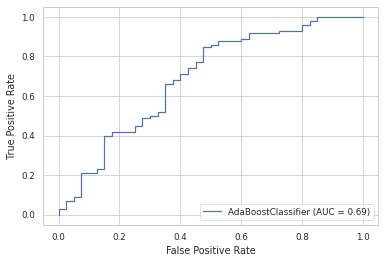

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
print("f1",np.mean(cross_val_score(model, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(model, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(model, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
plt.show()

In [ ]:
abc=pd.Series(model.feature_importances_)
len(abc[abc>0])

46

f1 0.4907233651642934
precision 0.7517132906415009
accuracy 0.7483348751156337
roc_auc 0.7100651799181211
[[ 0 40]
 [ 1 99]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.71      0.99      0.83       100

    accuracy                           0.71       140
   macro avg       0.36      0.49      0.41       140
weighted avg       0.51      0.71      0.59       140



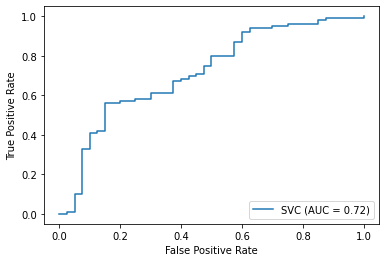

0.495

In [ ]:
from sklearn import svm
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
#Create a svm Classifier
clf = svm.SVC()# Linear Kernel
print("f1",np.mean(cross_val_score(clf, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(clf, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(clf, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(clf, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
plt.show()  
roc_auc_score(y_test, y_pred)  

f1 0.7278145223740189
precision 0.8363514678469748
accuracy 0.8193802035152636
roc_auc 0.8171692523163111
[[12 28]
 [ 3 97]]
              precision    recall  f1-score   support

           0       0.80      0.30      0.44        40
           1       0.78      0.97      0.86       100

    accuracy                           0.78       140
   macro avg       0.79      0.64      0.65       140
weighted avg       0.78      0.78      0.74       140



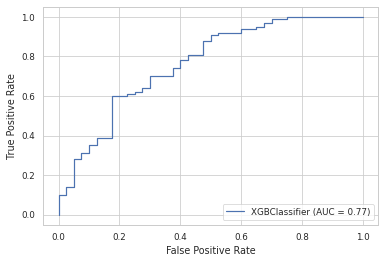

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

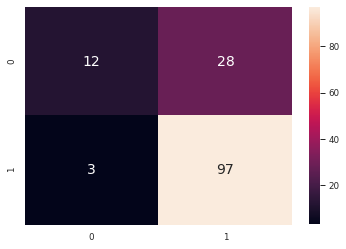

In [ ]:
from xgboost import XGBClassifier,plot_importance
# fit model no training data
model = XGBClassifier()
print("f1",np.mean(cross_val_score(model, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(model, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(model, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
#plt.savefig("smiles_opt/xgb_roc.png")
plt.show()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')
#plt.savefig("smiles_opt/xgb_heat.png")
model.get_params  

In [ ]:
abc=pd.Series(model.feature_importances_)
len(abc[abc>0])

190

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 489 samples in 0.406s...
[t-SNE] Computed neighbors for 489 samples in 6.394s...
[t-SNE] Computed conditional probabilities for sample 489 / 489
[t-SNE] Mean sigma: 2.383278
[t-SNE] KL divergence after 250 iterations with early exaggeration: 106.504379
[t-SNE] KL divergence after 300 iterations: 2.357793


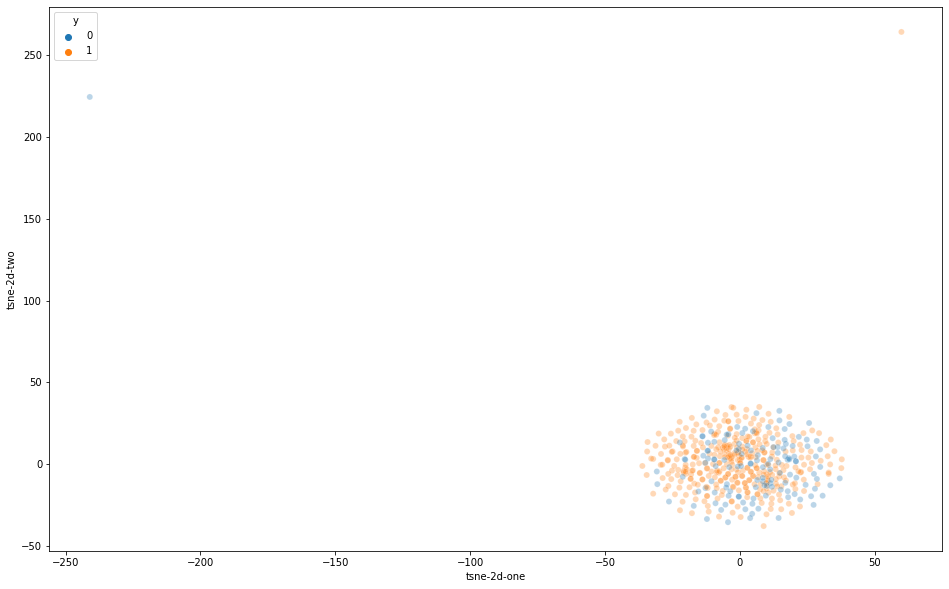

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
d2=pd.DataFrame(data=x)
#d2.insert(100, "100", output, True) 
#print(d2)
df_subset=pd.DataFrame()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(d2)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset["y"]=y
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    data=df_subset,
    legend="full",
    alpha=0.3
)
#plt.savefig("tsne_lig_feats.png")

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(d2)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
op = pd.Series(y)
finalDf = pd.concat([principalDf, op], axis = 1)

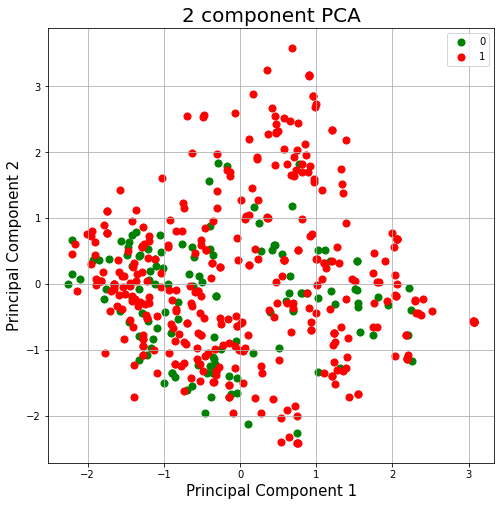

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf.iloc[:,2] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
#plt.savefig("pca_lig_feats.png")

W2v_SMiles

In [ ]:
#dik=np.load("sm_w2v_moldis.pkl",allow_pickle=True)#with fingerprints
dik=np.load("sm_w2v3.pkl",allow_pickle=True)
y=[]
x=[]
xt=[]
yt=[]
t1=[]
ll=["2Q0A","4D7S","3NEF","5ZCU","3NMH","3QT0","5UC1","3H52","1QKT","5TOA","3B7D","4F1Y"]
for i,num in enumerate(dik):
  if len(dik[i][3])!=0:
    dik[i][2]=np.sum(np.array(dik[i][2]),axis=0)
    #dik[i][1]=dik[i][1].reshape((1,dik[i][1].shape[0]*dik[i][1].shape[1]))
    temp=np.hstack([dik[i][2].reshape((1,100)),np.array(dik[i][3]).reshape((1,100))])
    #if dik[i][0] not in ll:
    y.append(dik[i][4])
    x.append(temp.reshape((temp.shape[1])))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.3,random_state=0)

f1 0.7617186459020571
precision 0.8553295070551357
accuracy 0.8301870748299318
accuracy [0.83673469 0.79591837 0.83673469 0.85714286 0.89795918 0.83673469
 0.7755102  0.89795918 0.7755102  0.79166667]
roc_auc 0.8192002442002442
[[ 18  26]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.86      0.41      0.55        44
           1       0.79      0.97      0.87       103

    accuracy                           0.80       147
   macro avg       0.83      0.69      0.71       147
weighted avg       0.81      0.80      0.78       147



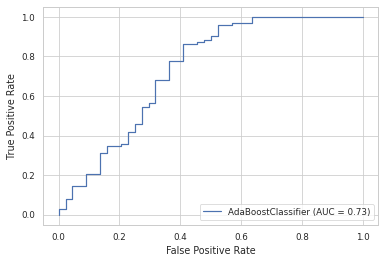

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
print("f1",np.mean(cross_val_score(model, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(model, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(model, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
plt.show()

In [ ]:
abc=pd.Series(model.feature_importances_)
abc=(abc[abc>0])
len(abc)

42

In [ ]:
abc=abc.index.values
len(abc[abc>100])

19

f1 0.5533551083552021
precision 0.7606209528214617
accuracy 0.7607142857142857
roc_auc 0.7750889586603872
[[  5  39]
 [  0 103]]
              precision    recall  f1-score   support

           0       1.00      0.11      0.20        44
           1       0.73      1.00      0.84       103

    accuracy                           0.73       147
   macro avg       0.86      0.56      0.52       147
weighted avg       0.81      0.73      0.65       147



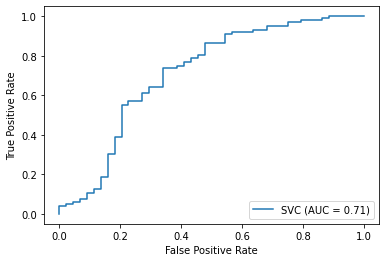

0.5568181818181819

In [ ]:
from sklearn import svm
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
#Create a svm Classifier
clf = svm.SVC()# Linear Kernel
print("f1",np.mean(cross_val_score(clf, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(clf, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(clf, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(clf, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
plt.show()  
roc_auc_score(y_test, y_pred)  

f1 0.752529378050553
precision 0.844581026374172
accuracy 0.8301445578231293
roc_auc 0.855322693179836
[[ 15  29]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.83      0.34      0.48        44
           1       0.78      0.97      0.86       103

    accuracy                           0.78       147
   macro avg       0.80      0.66      0.67       147
weighted avg       0.79      0.78      0.75       147



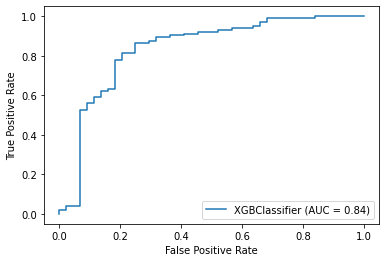

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

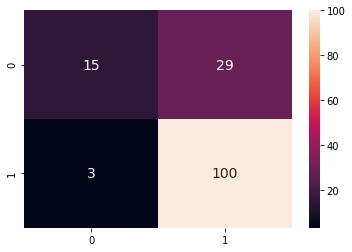

In [ ]:
from xgboost import XGBClassifier,plot_importance
# fit model no training data
x=np.array(x)
y=np.array(y)
model = XGBClassifier()
print("f1",np.mean(cross_val_score(model, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(model, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(model, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
#plt.savefig("smiles_opt/xgb_roc.png")
plt.show()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')
#plt.savefig("smiles_opt/xgb_heat.png")
model.get_params  

In [ ]:
abc=pd.Series(model.feature_importances_)
len(abc[abc>0])

145

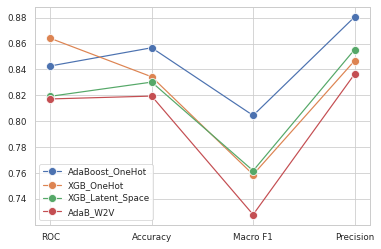

In [ ]:
rocs=[0.8426321297749869 ,0.8640397697540555,0.8192002442002442,0.8171692523163111]
accs=[0.85671768707483,0.8342687074829931,0.8301870748299318,0.8193802035152636]
f1s_mic=[0.8044128372294646,0.7587137120319454,0.7617186459020571,0.7278145223740189]
precs=[0.8805162643414928,0.8466857061746904,0.8553295070551357,0.8363514678469748]
xax=["ROC","Accuracy","Macro F1","Precision"]

adabmain=[]
xgbmain=[]
xgblatent=[]
adabw2v=[]
modelss=[adabmain,xgbmain,xgblatent,adabw2v]


for n,i in enumerate(rocs):
  modelss[n].append(rocs[n])
  modelss[n].append(accs[n])
  modelss[n].append(f1s_mic[n])
  modelss[n].append(precs[n])

sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")
sns.lineplot(x=xax,y=modelss[0],label="AdaBoost_OneHot",marker="o",markersize=8)
sns.lineplot(x=xax,y=modelss[1],label="XGB_OneHot",marker="o",markersize=8)
sns.lineplot(x=xax,y=modelss[2],label="XGB_Latent_Space",marker="o",markersize=8)
sns.lineplot(x=xax,y=modelss[3],label="AdaB_W2V",marker="o",markersize=8)
plt.legend(loc="lower left")
plt.savefig("combined_scores_smiles_models.png",dpi=1000)
plt.show()

Custom training data - Single Instance of receptor in training data

In [ ]:
dik=np.load("sm_w2v_with_protname.pkl",allow_pickle=True)

In [ ]:
dik[0][3]

'Peroxisome proliferator-activated receptor delta'

In [ ]:
y=[]
x=[]
xt=[]
yt=[]
receps=[]
for i,num in enumerate(dik):
  dik[i][2]=np.sum(np.array(dik[i][2]),axis=0)
  dik[i][1]=dik[i][1].reshape((1,dik[i][1].shape[0]*dik[i][1].shape[1]))
  temp=np.hstack([dik[i][2].reshape((1,100)),dik[i][1]])
  if dik[i][3] not in receps:
    receps.append(dik[i][3])
    y.append(dik[i][4])
    x.append(temp.reshape((temp.shape[1])))
  else:
    yt.append(dik[i][4])
    xt.append(temp.reshape((temp.shape[1])))

In [ ]:
len(x)

214

In [ ]:
X_train=np.array(x)
y_train=np.array(y)
X_test=np.array(xt)
y_test=np.array(yt)

[[ 26  45]
 [  9 195]]
              precision    recall  f1-score   support

           0       0.74      0.37      0.49        71
           1       0.81      0.96      0.88       204

    accuracy                           0.80       275
   macro avg       0.78      0.66      0.68       275
weighted avg       0.79      0.80      0.78       275



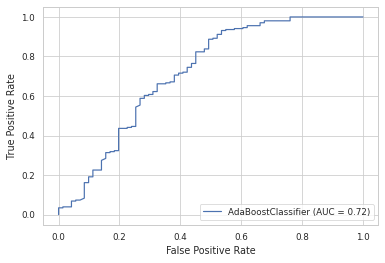

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
plt.show()

In [ ]:
abc=pd.Series(model.feature_importances_)
len(abc[abc>0])

45

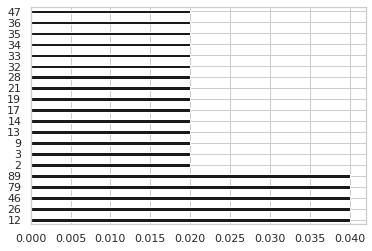

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=range(0,np.array(x).shape[1]))
sns.set_theme()
sns.set_style("whitegrid")
fig=feat_importances.nlargest(20).plot(kind='barh',grid=True,width=0.3,color="k").get_figure()
#fig.savefig("smiles_opt/adab_fi.png")

In [ ]:
w2v=[]
sm=[]
for n,i in feat_importances.nlargest(50).items():
  if n<100:
    w2v.append(i)
  else:
    sm.append(i)
  

In [ ]:
sum(w2v)

0.7800000000000005

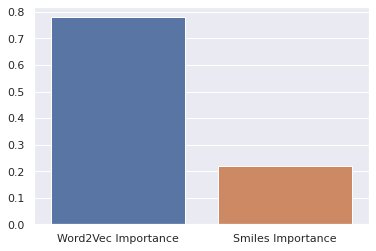

In [ ]:
vals=[sum(w2v),sum(sm)]
sns.set_style('darkgrid')
sns.barplot(x=["Word2Vec Importance","Smiles Importance"],y=vals)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

In [ ]:
len(x)

214

f1 0.6006046631498523
precision 0.7772167645735757
accuracy 0.7015151515151514
accuracy [0.59090909 0.72727273 0.68181818 0.68181818 0.57142857 0.71428571
 0.76190476 0.76190476 0.66666667 0.85714286]
roc_auc 0.641388888888889
[[ 4 11]
 [ 7 32]]
              precision    recall  f1-score   support

           0       0.36      0.27      0.31        15
           1       0.74      0.82      0.78        39

    accuracy                           0.67        54
   macro avg       0.55      0.54      0.54        54
weighted avg       0.64      0.67      0.65        54



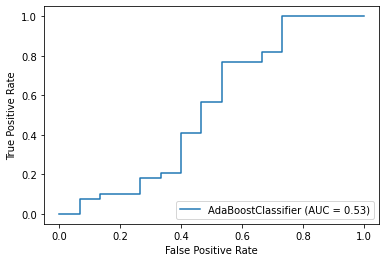

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
print("f1",np.mean(cross_val_score(model, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(model, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(model, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
plt.show()

Custom training data - Single Instance of ligand in training data

In [ ]:
dik=np.load("sm_w2v_with_protname.pkl",allow_pickle=True)

In [ ]:
y=[]
x=[]
xt=[]
yt=[]
ligands=[]
for i,num in enumerate(dik):
  dik[i][2]=np.sum(np.array(dik[i][2]),axis=0)
  dik[i][1]=dik[i][1].reshape((1,dik[i][1].shape[0]*dik[i][1].shape[1]))
  temp=np.hstack([dik[i][2].reshape((1,100)),dik[i][1]])
  if dik[i][5] not in ligands:
    ligands.append(dik[i][5])
    y.append(dik[i][4])
    x.append(temp.reshape((temp.shape[1])))
  else:
    yt.append(dik[i][4])
    xt.append(temp.reshape((temp.shape[1])))

In [ ]:
X_train=np.array(x)
y_train=np.array(y)
X_test=np.array(xt)
y_test=np.array(yt)

[[ 4  6]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.90      0.95      0.92        56

    accuracy                           0.86        66
   macro avg       0.73      0.67      0.70        66
weighted avg       0.85      0.86      0.85        66



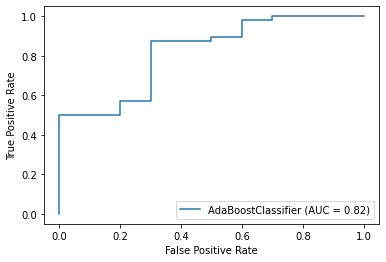

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

In [ ]:
len(x)

423

f1 0.7375530779338659
precision 0.8458175674450337
accuracy 0.794296788482835
accuracy [0.69767442 0.86046512 0.8372093  0.83333333 0.83333333 0.73809524
 0.76190476 0.80952381 0.80952381 0.76190476]
roc_auc 0.7887062310449406
[[15 14]
 [11 66]]
              precision    recall  f1-score   support

           0       0.58      0.52      0.55        29
           1       0.82      0.86      0.84        77

    accuracy                           0.76       106
   macro avg       0.70      0.69      0.69       106
weighted avg       0.76      0.76      0.76       106



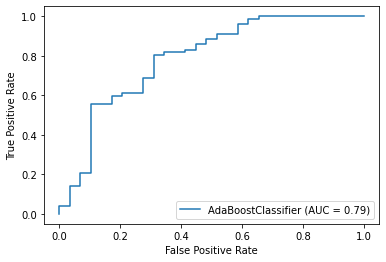

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
print("f1",np.mean(cross_val_score(model, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(model, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(model, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
plt.show()

Random testing - Testing on unseen pairs

In [ ]:
dik=np.load("sm_w2v_with_protname.pkl",allow_pickle=True)

In [ ]:
y=[]
x=[]
xt=[]
yt=[]
ligands={}
recps={}
pairs=[]
for i,num in enumerate(dik):
  dik[i][2]=np.sum(np.array(dik[i][2]),axis=0)
  dik[i][1]=dik[i][1].reshape((1,dik[i][1].shape[0]*dik[i][1].shape[1]))
  temp=np.hstack([dik[i][2].reshape((1,100)),dik[i][1]])
  ligands[dik[i][5]]=dik[i][1]
  recps[dik[i][3]]=dik[i][2].reshape((1,100))
  pairs.append(dik[i][5]+dik[i][3])
  y.append(dik[i][4])
  x.append(temp.reshape((temp.shape[1])))

In [ ]:
len(ligands),len(recps)

(423, 214)

In [ ]:
xt=[]
for i in recps:
  for j in ligands:
    if j+i not in pairs:
      temp=np.hstack([recps[i],ligands[j]])
      xt.append(temp.reshape((temp.shape[1])))

In [ ]:
len(xt)

90055

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.25,random_state=0)

In [ ]:
import random
vals=[]
X_test=[]
for i in range(0,500):
  xx=0
  while xx==0:
    temp=random.randint(0,len(xt)-1)
    if temp not in vals:
      X_test.append(xt[temp])
      vals.append(temp)
      xx=1
X_test=np.array(X_test)

In [ ]:
len(X_test)

500

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
import collections
collections.Counter(y_pred)

Counter({0: 127, 1: 373})

Trying out a new library (Dosent work)

In [ ]:
!pip install git+https://github.com/AMLab-Amsterdam/lie_learn
!pip install git+https://github.com/CNNs4QSPR/se3cnn.git
!pip install git+https://github.com/CNNs4QSPR/cnns4qspr.git

In [ ]:
from cnns4qspr import loader
from cnns4qspr import visualizer
from cnns4qspr import featurizer


myprotein_dict = loader.load_pdb('101M.pdb')
myprotein_dict.keys()

dict_keys(['x_coords', 'y_coords', 'z_coords', 'positions', 'atom_types', 'num_atoms', 'atom_type_set', 'num_atom_types', 'residues', 'residue_set', 'shifted_positions'])

In [ ]:

shift_coordinates = loader.shift_coords(myprotein_dict)
field_dict = loader.make_fields(myprotein_dict)
make_ = loader.voxelize('101M.pdb',channels = ['backbone','sidechain'])

afp = loader.atoms_from_residues(myprotein_dict,['GLU'])
plottable=visualizer.plot_field(field_dict['CA'],show=False)
plottable.show()

In [ ]:
make_['charged'].shape

(50, 50, 50)

In [ ]:
import glob
import pickle

for filename in glob.glob("ant_real/*.pdb"):
  make_ = loader.voxelize(filename,channels = ['backbone'])
  abc=featurizer.featurize(make_)
  with open("feat_prots/"+filename[-8:-4]+".pkl","wb") as fp:
    pickle.dump(abc,fp)
for filename in glob.glob("ago_real/*.pdb"):
  make_ = loader.voxelize(filename,channels = ['backbone'])
  abc=featurizer.featurize(make_)
  with open("feat_prots/"+filename[-8:-4]+".pkl","wb") as fp:
    pickle.dump(abc,fp)

#abc=featurizer.gen_feature_set("ant_real/")

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



In [ ]:
import os
os.chdir('/')  

In [ ]:
!mv cnn_no_vae.ckpt /usr/local/lib/python3.6/dist-packages/cnns4qspr/se3cnn_v3/checkpoints/

In [ ]:
abc

{'charged': array([[ 2.71902800e-01, -1.54241610e+00,  4.81209278e-01,
         -4.88502115e-01, -3.89500469e-01, -7.29485273e-01,
         -4.86155391e-01,  8.73696133e-02,  1.09365964e+00,
         -1.04557729e+00, -6.54292166e-01, -2.42153183e-01,
          4.78747129e-01, -7.91704476e-01, -3.70323747e-01,
          1.63349479e-01,  5.32836378e-01, -4.58521992e-01,
         -2.02153730e+00,  2.33354256e-01,  2.01922715e-01,
         -3.26473773e-01, -2.12105021e-01,  1.13297544e-01,
          1.22169137e+00,  2.60019228e-02, -2.71198630e-01,
          1.36750057e-01,  1.04590023e+00,  4.50872391e-01,
          3.25423181e-01,  1.33227551e+00, -1.11790204e+00,
         -1.14196432e+00, -4.38397862e-02, -5.86298347e-01,
          9.07110572e-02, -5.44606626e-01, -5.40785015e-01,
          1.29039615e-01, -1.21794641e+00,  8.35792840e-01,
          6.36909485e-01,  1.61583185e-01, -4.28634107e-01,
          8.88372600e-01, -1.87844187e-01, -1.53435230e+00,
          1.10851061e+00,  9.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
print("f1",np.mean(cross_val_score(model, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(model, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(model, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
plt.show()

In [ ]:
!pip install optuna

     |████████████████████████████████| 296kB 3.7MB/s 
     |████████████████████████████████| 81kB 5.7MB/s 
     |████████████████████████████████| 1.2MB 17.7MB/s 
     |████████████████████████████████| 143kB 26.3MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 112kB 26.3MB/s 
     |████████████████████████████████| 81kB 6.8MB/s 
  Created wheel for alembic: filename=alembic-1.6.2-py2.py3-none-any.whl size=164219 sha256=3364d376a777fe9f77dd133a67ff568f3f8c7ad5097bd065297b612bc1cd454e
  Stored in directory: /root/.cache/pip/wheels/a5/63/44/db29401e49ef5331c163b591f12a465c40af864bfa888dabd2
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=e611e430c1b81e5058c5696954fb97d53ee8551827cfe0ccb60b69cd963703f2
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built alembic pyperclip


In [ ]:
import optuna

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import sklearn
model = AdaBoostClassifier()

def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_booster", value=trial.user_attrs["best_booster"])

def objective(trial):
  classifier_name = trial.suggest_categorical('classifier', ['AdaBoostClassifier'])
  n_est = int(trial.suggest_loguniform('n_estimators', 5, 200))
  classifier_obj = AdaBoostClassifier(n_estimators=n_est)
  score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1,cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))
  accuracy = score.mean()
  classifier_obj.fit(x,y)
  trial.set_user_attr(key="best_booster", value=classifier_obj)
  return accuracy
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, callbacks=[callback])

[I 2021-05-08 00:57:41,314] A new study created in memory with name: no-name-a2194b92-7886-40b5-9b51-8f46ec31fa96
[I 2021-05-08 00:58:01,831] Trial 0 finished with value: 0.8363945578231293 and parameters: {'classifier': 'AdaBoostClassifier', 'n_estimators': 24.985460245777357}. Best is trial 0 with value: 0.8363945578231293.
[I 2021-05-08 00:58:10,584] Trial 1 finished with value: 0.7504676870748299 and parameters: {'classifier': 'AdaBoostClassifier', 'n_estimators': 10.839826310180467}. Best is trial 0 with value: 0.8363945578231293.
[I 2021-05-08 00:58:20,918] Trial 2 finished with value: 0.7566326530612245 and parameters: {'classifier': 'AdaBoostClassifier', 'n_estimators': 12.445355543874172}. Best is trial 0 with value: 0.8363945578231293.
[I 2021-05-08 00:59:52,081] Trial 3 finished with value: 0.8363520408163266 and parameters: {'classifier': 'AdaBoostClassifier', 'n_estimators': 110.63655930864017}. Best is trial 0 with value: 0.8363945578231293.
[I 2021-05-08 00:59:56,510] Tr

In [ ]:
best_model=study.user_attrs["best_booster"]

In [ ]:
best_model.predict(x)

In [ ]:
_ = joblib.dump(best_model, "adaboost_smiles_opt.pkl", compress=9)

In [ ]:
from xgboost import XGBClassifier
import sklearn

def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_booster", value=trial.user_attrs["best_booster"])


model = XGBClassifier()
def objective(trial):
  classifier_name = trial.suggest_categorical('classifier', ['XGBClassifier'])
  n_est = int(trial.suggest_loguniform('n_estimators', 5, 200))
  classifier_obj = XGBClassifier(n_estimators=n_est)
  score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1,cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))
  classifier_obj.fit(x,y)
  trial.set_user_attr(key="best_booster", value=classifier_obj)
  accuracy = score.mean()
  return accuracy
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, callbacks=[callback])

[I 2021-05-10 07:07:53,991] A new study created in memory with name: no-name-eab8b189-4223-43da-80f3-ece9757b3a78
[I 2021-05-10 07:08:20,069] Trial 0 finished with value: 0.8159013605442176 and parameters: {'classifier': 'XGBClassifier', 'n_estimators': 21.01237434560762}. Best is trial 0 with value: 0.8159013605442176.
[I 2021-05-10 07:08:28,239] Trial 1 finished with value: 0.7750850340136055 and parameters: {'classifier': 'XGBClassifier', 'n_estimators': 5.430451533252936}. Best is trial 0 with value: 0.8159013605442176.
[I 2021-05-10 07:08:40,350] Trial 2 finished with value: 0.7974489795918368 and parameters: {'classifier': 'XGBClassifier', 'n_estimators': 9.760606123912268}. Best is trial 0 with value: 0.8159013605442176.
[I 2021-05-10 07:11:00,735] Trial 3 finished with value: 0.836309523809524 and parameters: {'classifier': 'XGBClassifier', 'n_estimators': 136.37292099637227}. Best is trial 3 with value: 0.836309523809524.
[I 2021-05-10 07:11:35,101] Trial 4 finished with value

KeyboardInterrupt: ignored

In [ ]:
best_model=study.user_attrs["best_booster"]

In [ ]:
_ = joblib.dump(best_model, "xgb_smiles_opt.pkl", compress=9)

In [ ]:
dik=np.load("sm_w2v_with_window_1.pkl",allow_pickle=True)#window 1

In [ ]:
y=[]
x=[]
xt=[]
yt=[]
receps=[]
for i,num in enumerate(dik):
  print(np.array(dik[i][2]),np.array(dik[i][2]).shape)
  dik[i][2]=np.sum(np.array(dik[i][2]),axis=0)
  dik[i][1]=dik[i][1].reshape((1,dik[i][1].shape[0]*dik[i][1].shape[1]))
  temp=np.hstack([dik[i][2].reshape((1,100)),dik[i][1]])
  if dik[i][3] not in receps:
    receps.append(dik[i][3])
    y.append(dik[i][4])
    x.append(temp.reshape((temp.shape[1])))
  else:
    yt.append(dik[i][4])
    xt.append(temp.reshape((temp.shape[1])))

0.0 ()


ValueError: ignored

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
print("f1",np.mean(cross_val_score(model, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(model, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(model, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
plt.show()

In [ ]:
!pip install catboost
!pip install lightgbm

In [ ]:
import catboost as cb
import xgboost as xgb
import lightgbm as lgb

train_pool = cb.Pool(X_train, y_train)
test_pool = cb.Pool(X_test,y_test) 
 
cbr = cb.CatBoostClassifier()
model = cbr.fit(train_pool,verbose=0)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[13 25]
 [ 1 84]]
              precision    recall  f1-score   support

           0       0.93      0.34      0.50        38
           1       0.77      0.99      0.87        85

    accuracy                           0.79       123
   macro avg       0.85      0.67      0.68       123
weighted avg       0.82      0.79      0.75       123



In [ ]:
scores

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.681142,0.002495,0.680384,0.000780
1,1,0.673651,0.002583,0.672359,0.001404
2,2,0.665249,0.003070,0.662918,0.001642
3,3,0.657214,0.004270,0.654577,0.001924
4,4,0.650627,0.004700,0.647488,0.002904
...,...,...,...,...,...
95,95,0.482539,0.040491,0.408131,0.009954
96,96,0.482303,0.040973,0.406938,0.009943
97,97,0.482007,0.041667,0.405835,0.009899
98,98,0.481522,0.042210,0.404525,0.009843


In [ ]:
lgbr = lgb.LGBMClassifier()
model = lgbr.fit(X_train,y_train,verbose=0)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

NameError: ignored

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
# evaluate the model
#print("f1",np.mean(cross_val_score(model, x, y,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
#print("precision",np.mean(cross_val_score(model, x, y,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
#print("accuracy",np.mean(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
#print("accuracy",(cross_val_score(model, x, y,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
#print("roc_auc",np.mean(cross_val_score(model, x, y,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 489 samples in 0.410s...
[t-SNE] Computed neighbors for 489 samples in 6.644s...
[t-SNE] Computed conditional probabilities for sample 489 / 489
[t-SNE] Mean sigma: 2.383278
[t-SNE] KL divergence after 250 iterations with early exaggeration: 117.629387
[t-SNE] KL divergence after 300 iterations: 3.106818


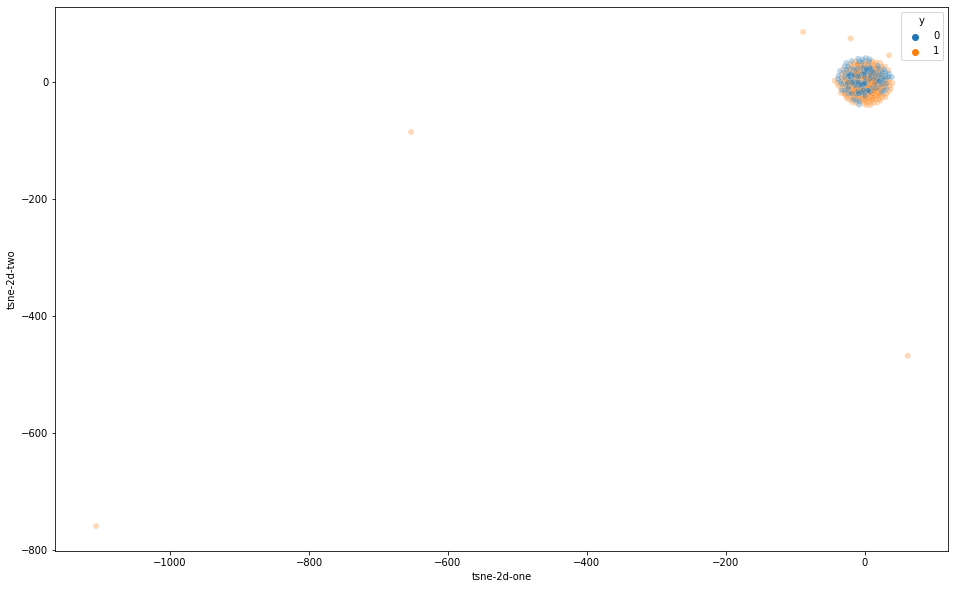

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
d2=pd.DataFrame(data=x)
#d2.insert(100, "100", output, True) 
#print(d2)
df_subset=pd.DataFrame()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(d2)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset["y"]=y
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    data=df_subset,
    legend="full",
    alpha=0.3
)
#plt.savefig("tsne_lig_feats.png")

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(d2)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
op = pd.Series(y)
finalDf = pd.concat([principalDf, op], axis = 1)

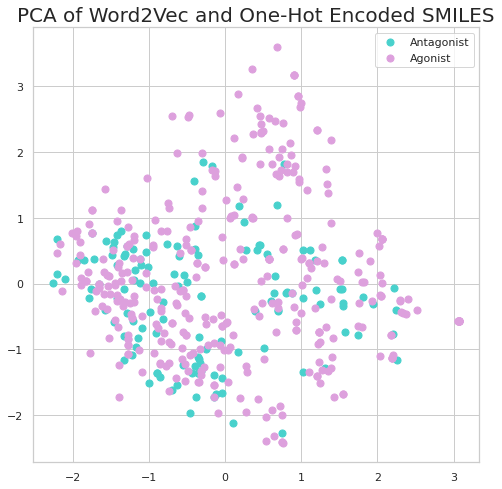

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.set_theme()
sns.set_style("whitegrid")
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA of Word2Vec and One-Hot Encoded SMILES', fontsize = 20)
targets = [0,1]
colors = ['mediumturquoise', 'plum']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf.iloc[:,2] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(["Antagonist","Agonist"])
#ax.grid()
plt.show()
plt.savefig("pca_w2v_smiles.png", dpi = 1000)

# NEW INFERENCES

In [ ]:
dik=np.load("sm_w2v2.pkl",allow_pickle=True)#use this for best
y=[]
x=[]
xt=[]
yt=[]
pdb_names = []
ll=["2Q0A","4D7S","3NEF","5ZCU","3NMH","3QT0","5UC1","3H52","1QKT","5TOA","3B7D","4F1Y"]
for i,num in enumerate(dik):
  dik[i][2]=np.sum(np.array(dik[i][2]),axis=0)
  dik[i][1]=dik[i][1].reshape((1,dik[i][1].shape[0]*dik[i][1].shape[1]))
  temp=np.hstack([dik[i][2].reshape((1,100)),dik[i][1]])
  #if dik[i][0] not in ll:
  y.append(dik[i][3])
  x.append(temp.reshape((temp.shape[1])))
  pdb_names.append(num[0])
  #else:
  #  yt.append(dik[i][3])
  #  xt.append(temp.reshape((temp.shape[1])))

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
pairwise = pd.read_excel('pairwise.xlsx')

In [ ]:
pairwise.loc[0]['Ligand'].split(",")[-1]

'3EQ'

In [ ]:
ligand_names = []
receptor_names = []
for i in pdb_names:
  ligand_names.append(pairwise.loc[pairwise.index[pairwise['PDB_ID'] == i].tolist()[0]]['Ligand'].split(",")[-1])
  receptor_names.append(pairwise.loc[pairwise.index[pairwise['PDB_ID'] == i].tolist()[0]]['Receptor'])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
model.fit(x, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
feat_importances = pd.Series(model.feature_importances_).nlargest(46)
feat_importances

14      0.04
26      0.04
38      0.04
89      0.04
3       0.02
5       0.02
10      0.02
11      0.02
13      0.02
16      0.02
17      0.02
18      0.02
21      0.02
32      0.02
33      0.02
42      0.02
43      0.02
44      0.02
46      0.02
49      0.02
53      0.02
55      0.02
57      0.02
63      0.02
64      0.02
65      0.02
68      0.02
70      0.02
77      0.02
78      0.02
79      0.02
85      0.02
90      0.02
96      0.02
359     0.02
465     0.02
693     0.02
737     0.02
1137    0.02
1320    0.02
1548    0.02
1764    0.02
2239    0.02
2668    0.02
2789    0.02
2840    0.02
dtype: float64

In [ ]:
newx_protein = []
newx_ligand = []
for i in x:
  tempp = []
  templ = []
  for pos in feat_importances.index:
    if pos > 100:
      templ.append(i[pos])
    else:
      tempp.append(i[pos])

  newx_protein.append(np.array(tempp))
  newx_ligand.append(np.array(templ))
newx_protein = np.array(newx_protein)
newx_ligand = np.array(newx_ligand)

Only lIgand Feats

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
d2=pd.DataFrame(data=newx_ligand)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(d2)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['ligand_name'] = ligand_names
principalDf['receptor_name'] = receptor_names

In [ ]:
op = pd.Series(y)
finalDf = pd.concat([principalDf, op], axis = 1)

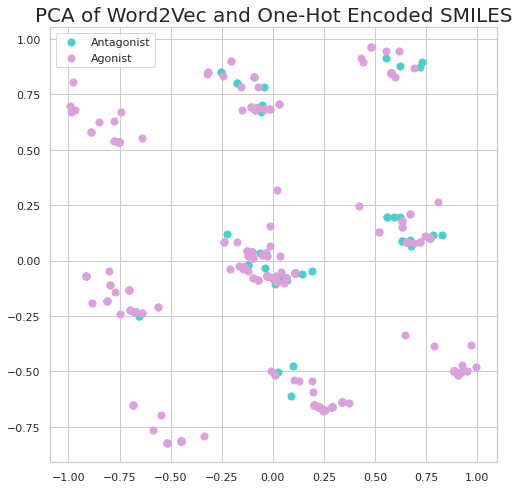

In [ ]:
sns.set_theme()
sns.set_style("whitegrid")
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA of Word2Vec and One-Hot Encoded SMILES', fontsize = 20)
targets = [0,1]
colors = ['mediumturquoise', 'plum']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf.iloc[:,-1] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
#for i, txt in enumerate(ligand_names):
#    ax.annotate(txt, (x[i], y[i]))
#ax.annotate(finalDf.loc[indicesToKeep, 'ligand_name'], (finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2']))
ax.legend(["Antagonist","Agonist"])
#ax.grid()
plt.show()
#plt.savefig("pca_w2v_smiles_top46.png", dpi = 1000)

Only Protein Feats

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
d2=pd.DataFrame(data=newx_protein)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(d2)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
op = pd.Series(y)
finalDf = pd.concat([principalDf, op], axis = 1)

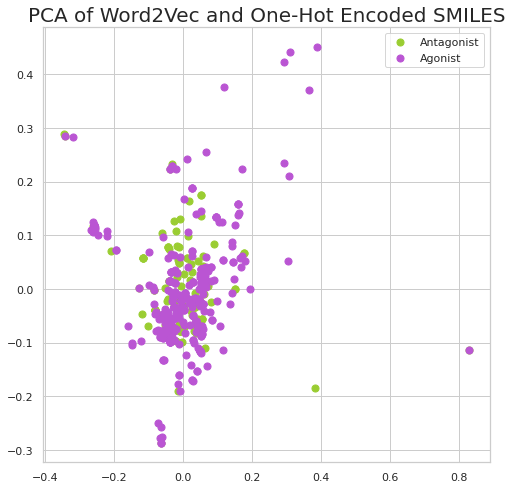

In [ ]:
sns.set_theme()
sns.set_style("whitegrid")
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA of Word2Vec and One-Hot Encoded SMILES', fontsize = 20)
targets = [0,1]
colors = ['yellowgreen', 'mediumorchid']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf.iloc[:,2] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(["Antagonist","Agonist"])
#ax.grid()
plt.savefig("pca_w2v_proteins.png", dpi = 1000)
plt.show()

In [ ]:
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=1c087d6db66c07111c68e0fb45c39c94e57c17ba1e02aa9b3b70b7f5756ba06e
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


In [ ]:
from adjustText import adjust_text

In [ ]:
newx= []
for i in x:
  temp = []
  for pos in feat_importances.index:
      temp.append(i[pos])
  newx.append(np.array(temp))

newx = np.array(newx)

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
d2=pd.DataFrame(data=newx)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(d2)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['ligand_name'] = ligand_names
principalDf['receptor_name'] = receptor_names

In [ ]:
op = pd.Series(y)
finalDf = pd.concat([principalDf, op], axis = 1)

In [ ]:
doubles = []
temp = []
for i in ligand_names:
  if i not in temp:
    temp.append(i)
  else:
    doubles.append(i)

In [ ]:
mask = [any([kw in r for kw in doubles]) for r in finalDf['ligand_name']]
finalDf_masked = finalDf[mask]
finalDf_masked.reset_index(drop=True, inplace=True)

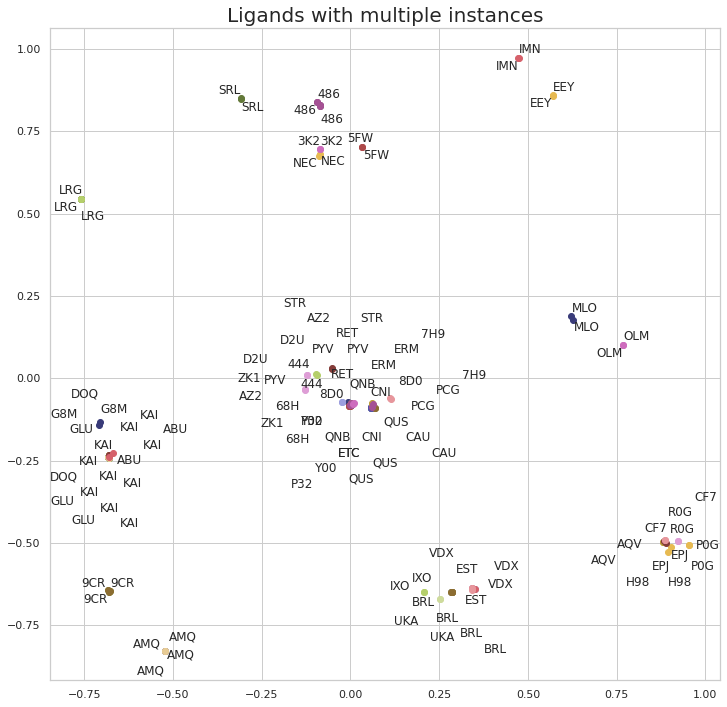

In [ ]:
sns.set_theme()
sns.set_style("whitegrid")
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Ligands with multiple instances', fontsize = 20)
targets = doubles

NUM_COLORS = 66

cm = plt.get_cmap('tab20b')

for n, i  in enumerate(targets):
    indicesToKeep = finalDf_masked.iloc[:,2] == i
    ax.scatter(finalDf_masked.loc[indicesToKeep, 'principal component 1'], finalDf_masked.loc[indicesToKeep, 'principal component 2'], color = cm(n//3*3.0/NUM_COLORS))

texts = [plt.text(finalDf_masked.loc[i, 'principal component 1'], finalDf_masked.loc[i, 'principal component 2'], finalDf_masked.loc[i, 'ligand_name']) for i in range(len(finalDf_masked))]# if finalDf_masked.loc[i, 'ligand_name'] == "DOQ"]
adjust_text(texts )#, arrowprops=dict(arrowstyle='->', color='red'))
#ax.legend(doubles)
#ax.grid()
#plt.savefig(f"ligand_multiple_top46_annotated_{len(targets)}.png", dpi = 1000)
plt.show()

In [ ]:
doubles_rec = []
temp = []
for i in receptor_names:
  if i not in temp:
    temp.append(i)
  else:
    doubles_rec.append(i)

In [ ]:
mask = [any([kw in r for kw in doubles_rec]) for r in finalDf['receptor_name']]
finalDf_masked = finalDf[mask]
finalDf_masked.reset_index(drop=True, inplace=True)

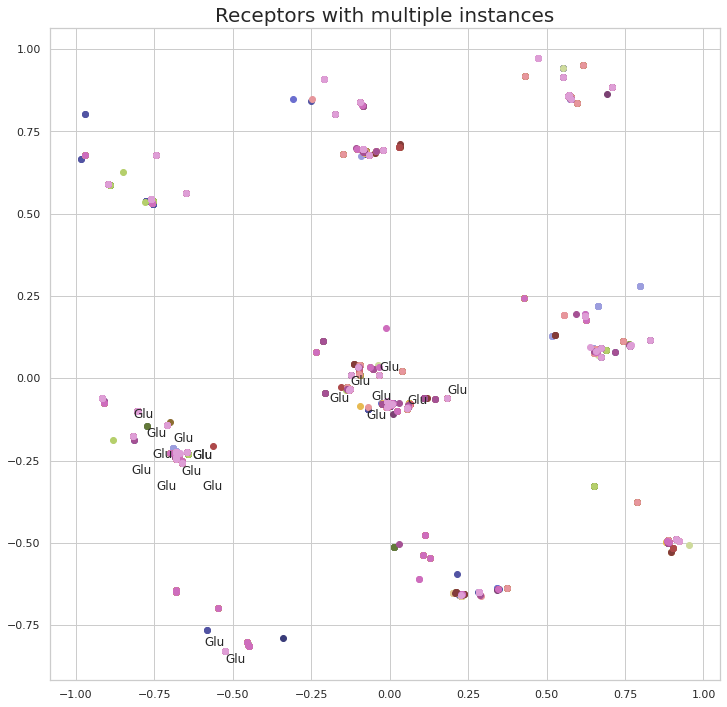

In [ ]:
sns.set_theme()
sns.set_style("whitegrid")
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Receptors with multiple instances', fontsize = 20)
targets = doubles_rec

NUM_COLORS = len(doubles_rec)

cm = plt.get_cmap('tab20b')

for n, i  in enumerate(targets):
    indicesToKeep = finalDf_masked.iloc[:,3] == i
    ax.scatter(finalDf_masked.loc[indicesToKeep, 'principal component 1'], finalDf_masked.loc[indicesToKeep, 'principal component 2'], color = cm(n//3*3.0/NUM_COLORS))

texts = [plt.text(finalDf_masked.loc[i, 'principal component 1'], finalDf_masked.loc[i, 'principal component 2'], finalDf_masked.loc[i, 'receptor_name'][:3]) for i in range(len(finalDf_masked)) if finalDf_masked.loc[i, 'receptor_name'] == "Glutamate receptor 2"]
adjust_text(texts )#, arrowprops=dict(arrowstyle='->', color='red'))
#ax.legend(doubles)
#ax.grid()
plt.savefig("receptors_multiple_top46_{len(targets)}_2.png", dpi = 1000)
plt.show()

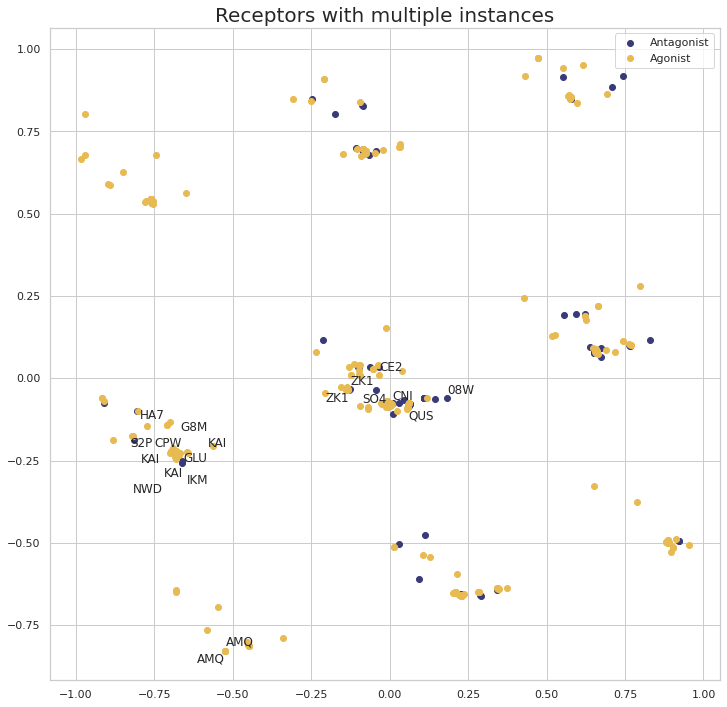

In [ ]:
sns.set_theme()
sns.set_style("whitegrid")
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Receptors with multiple instances', fontsize = 20)
targets = [0, 1]

NUM_COLORS = len(doubles_rec)

cm = plt.get_cmap('tab20b')

for n, i  in enumerate(targets):
    indicesToKeep = finalDf_masked.iloc[:,4] == i
    ax.scatter(finalDf_masked.loc[indicesToKeep, 'principal component 1'], finalDf_masked.loc[indicesToKeep, 'principal component 2'], color = cm(n*10))

texts = [plt.text(finalDf_masked.loc[i, 'principal component 1'], finalDf_masked.loc[i, 'principal component 2'], finalDf_masked.loc[i, 'ligand_name'][:3]) for i in range(len(finalDf_masked)) if finalDf_masked.loc[i, 'receptor_name'] == "Glutamate receptor 2"]
adjust_text(texts )#, arrowprops=dict(arrowstyle='->', color='red'))
ax.legend(["Antagonist", "Agonist"])
plt.savefig("glutamate_receptor_2_multiple_top46_{len(targets)}.png", dpi = 1000)
plt.show()

In [ ]:
finalDf_masked = finalDf_masked[finalDf_masked.iloc[:,3] == "Glutamate receptor 2"]
finalDf_masked.reset_index(drop=True, inplace=True)

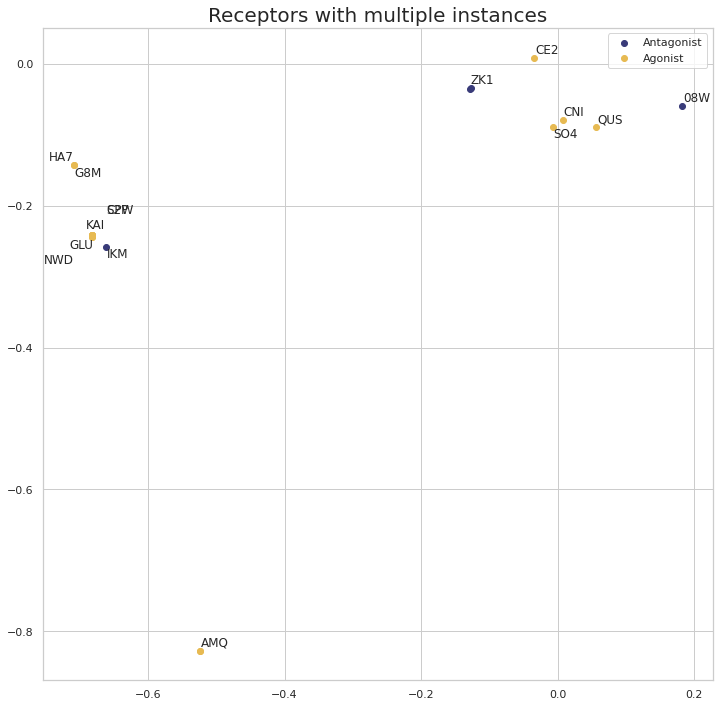

In [ ]:
sns.set_theme()
sns.set_style("whitegrid")
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Receptors with multiple instances', fontsize = 20)
targets = [0, 1]

NUM_COLORS = len(targets)

cm = plt.get_cmap('tab20b')

for n, i  in enumerate(targets):
    indicesToKeep = finalDf_masked.iloc[:,4] == i
    ax.scatter(finalDf_masked.loc[indicesToKeep, 'principal component 1'], finalDf_masked.loc[indicesToKeep, 'principal component 2'], color = cm(n*10))

texts = []
done =[] 
for i in range(len(finalDf_masked)):
  if finalDf_masked.loc[i, 'ligand_name'] not in done:
    texts.append(plt.text(finalDf_masked.loc[i, 'principal component 1'], finalDf_masked.loc[i, 'principal component 2'], finalDf_masked.loc[i, 'ligand_name']))
    done.append(finalDf_masked.loc[i, 'ligand_name'])
adjust_text(texts )#, arrowprops=dict(arrowstyle='->', color='red'))
ax.legend(["Antagonist", "Agonist"])
#ax.grid()
plt.savefig("glutamate_receptor_2_ligands.png", dpi = 1000)
plt.show()

In [ ]:
#dik=np.load("sm_w2v_moldis.pkl",allow_pickle=True)
dik=np.load("sm_w2v_ligmat.pkl",allow_pickle=True)
y=[]
x=[]
xt=[]
yt=[]
t1=[]
ln = []
ll=["2Q0A","4D7S","3NEF","5ZCU","3NMH","3QT0","5UC1","3H52","1QKT","5TOA","3B7D","4F1Y"]
for i,num in enumerate(dik):
  if np.array(dik[i][3]).shape[0]!=0:
    dik[i][2]=np.sum(np.array(dik[i][2]),axis=0)
    dik[i][3]=np.pad(np.array(dik[i][3]),(0,(1000-len(dik[i][3]))),'constant')
    t1.append(dik[i][3])
    temp=np.hstack([dik[i][2].reshape((1,100)),dik[i][3].reshape((1,dik[i][3].shape[0]))])
    y.append(dik[i][4])
    ln.append(dik[i][-1])
    x.append(temp.reshape((temp.shape[1])))

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
d2=pd.DataFrame(data=t1)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(d2)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf["ligand_name"] = ln

In [ ]:
op = pd.Series(y)
finalDf = pd.concat([principalDf, op], axis = 1)

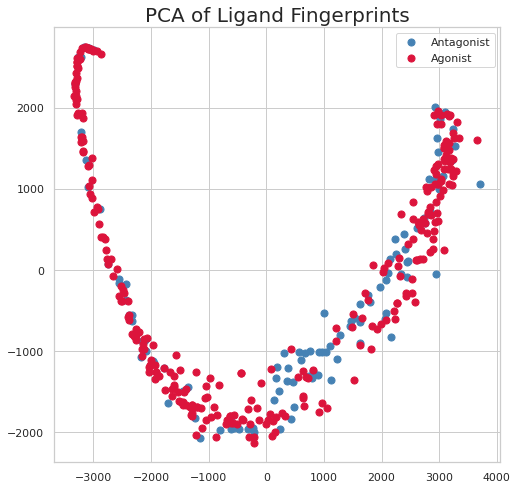

In [ ]:
sns.set_theme()
sns.set_style("whitegrid")
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA of Ligand Fingerprints', fontsize = 20)
targets = [0,1]
colors = ['steelblue', 'crimson']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf.iloc[:,-1] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(["Antagonist","Agonist"])
#ax.grid()
plt.savefig("pca_lig_feats_main.png", dpi = 1000)
plt.show()

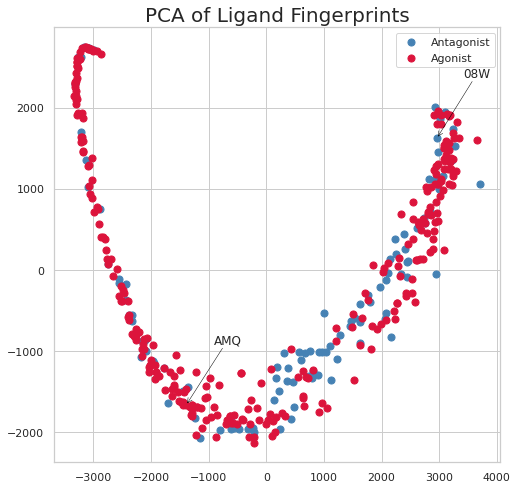

In [ ]:
sns.set_theme()
sns.set_style("whitegrid")
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA of Ligand Fingerprints', fontsize = 20)
targets = [0,1]
colors = ['steelblue', 'crimson']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf.iloc[:,-1] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

texts = [plt.text(finalDf.loc[i, 'principal component 1'], finalDf.loc[i, 'principal component 2'], finalDf.loc[i, 'ligand_name']) for i in range(len(finalDf)) if finalDf.loc[i, 'ligand_name'] in ["08W", "AMQ"]]
adjust_text(texts, expand_points=(3, 10),
    arrowprops=dict(
        arrowstyle="->",
        color = "black",
        lw=0.5
    ))
ax.legend(["Antagonist","Agonist"])
#ax.grid()
plt.savefig("glu2_pca_lig_feats.png", dpi = 1000)
plt.show()

In [ ]:
principalDf
for i in range(len(principalDf)):
  if principalDf.loc[i, 'ligand_name'] == "08W" or principalDf.loc[i, 'ligand_name'] == "AMQ":
     print(principalDf.loc[i])

principal component 1   -1389.99
principal component 2   -1667.15
ligand_name                  AMQ
Name: 60, dtype: object
principal component 1    2958.28
principal component 2    1620.92
ligand_name                  08W
Name: 293, dtype: object


In [ ]:
ligs = {}
finalDf
for i in range(len(finalDf)):
  if finalDf.loc[i, 'ligand_name'] not in ligs:
    ligs[finalDf.loc[i, 'ligand_name']] = [finalDf.loc[i, 0]]
  else:
    ligs[finalDf.loc[i, 'ligand_name']].append(finalDf.loc[i, 0])


In [ ]:
both = []
for i in ligs:
  if len(set(ligs[i])) > 1:
    both.append(i)

In [ ]:
[ligs[x] for x in both]

[[1, 0], [1, 1, 0], [1, 0, 0], [1, 0], [1, 0]]

In [ ]:
both

['PCG', 'PYV', '486', 'EST', 'CNI']

In [ ]:
for i in range(len(finalDf)):
  if finalDf.loc[i, 'ligand_name'] in both:
    print(finalDf.loc[i])

principal component 1                                            -0.373909
principal component 2                                            -0.378789
ligand_name                                                            PCG
receptor_name            Potassium/sodium hyperpolarization-activated c...
0                                                                        1
Name: 99, dtype: object
principal component 1                      -0.420684
principal component 2                      -0.416015
ligand_name                                      PYV
receptor_name            Abscisic acid receptor PYL1
0                                                  1
Name: 151, dtype: object
principal component 1                                           0.0470288
principal component 2                                            0.718964
ligand_name                                                           486
receptor_name            Peroxisome proliferator-activated receptor gamma
0              